In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# np.random.seed(198108)

N = 50
threshold = 0.5
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['figure.figsize'] = (12, 12)

x = np.arange(N)
y = np.arange(N)
X, Y = np.meshgrid(x, y)
# Z = np.random.rand(N, N)
status = ["C1", "C4", 'white']
prob = [0.4, 0.4, 0.2]

def init_z():
    Z = np.random.choice(a=status, size=(N**2), p=prob)
    Z.shape = (N, N)
    return Z

Z = init_z()

TypeError: 'RcParams' object is not callable

In [2]:

def get_null_cells(Z):
    """获取空白格子的位置
    Z:np.array, N*N
    return:list of cells position
    """
    if not Z.shape == (N, N):
        Z.shape = (N, N)
    cells = np.where(Z == "white")
    return cells


def get_cell_happiness(Z, row, col):
    """获取每个单元格的满意程度阈值
    Z: N*N np.array
    row: int, col:int
    return: happiness:int
    """
    if not Z.shape == (N, N):
        Z.shape = (N, N)
    if Z[row, col] == "white":
        return np.NaN
    same, count = 0, 0
    left = 0 if col==0 else col-1
    right = Z.shape[1] if col==Z.shape[1]-1 else col+2
    top = 0 if row==0 else row-1
    bottom = Z.shape[0] if row==Z.shape[0]-1 else row+2
    # print(top, bottom, left, right)
    for i in range(top, bottom):
        for j in range(left, right):
            # print(list(range(left, right)))
            if (i, j) == (row, col) or Z[i,j] == "white":
                continue
            # print(Z[i,j], i, j)
            elif Z[i, j] == Z[row, col]:
                same += 1
                count += 1
            else:
                count += 1
    # print('in',same,count)
    if not count == 0:
        happiness = same / count
    else:
        happiness = 0
    return happiness


def get_all_happiness(Z):
    """得到所有格子的满意度
    return: np.array N*N
    """
    hap_scores = []
    for row in range(Z.shape[0]):
        for col in range(Z.shape[1]):
            # print(row, col)
            hap_scores.append(get_cell_happiness(Z, row, col))
    hap_scores = np.array(hap_scores)
    hap_scores.shape = Z.shape
    return hap_scores

def hap_mean(Z):
    """所有格子的平均满意度
    return: res -> int
    """
    hap_scores = get_all_happiness(Z)
    res = hap_scores[np.where(hap_scores>=0)].mean()
    return res


def get_unhap_cells(Z=Z, threshold=threshold):
    """得到不满意的格子
    return: tuple 2 items
    """
    hap_scores = get_all_happiness(Z)
    res = np.where(hap_scores < threshold)
    return res

def unhap_ratio(Z):
    hap_scores = get_all_happiness(Z)
    res = np.sum(hap_scores<threshold) / np.sum(hap_scores>=0)
    # unhap_count = len(get_unhap_cells()[0])
    # print(unhap_count)
    # res = unhap_count / len(Z[np.where(Z!="white")])
    return res

def move(Z):
    unhap_cells = get_unhap_cells()
    for i in range(len(unhap_cells[0])):
        blank_cells = get_null_cells(Z)
        unhap_row = unhap_cells[0][i]
        unhap_col = unhap_cells[1][i]
        j = np.random.choice(range(len(blank_cells[0])))
        blank_row = blank_cells[0][j]
        blank_col = blank_cells[1][j]
        Z[unhap_row, unhap_col], Z[blank_row, blank_row] = Z[blank_row, blank_row], Z[unhap_row, unhap_col]



In [3]:
def draw_raw(Z):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, marker='s', c=Z.ravel(), s=80, lw=0, ec='w')
    ax.set_facecolor((.85,.85,.85))
    ax.invert_yaxis()
    ax.set(title=f"random distribution of 3 kind cells (blank cells ratio {prob[-1]*100}%)")
    ax.set(xlabel=f"C1={np.sum(Z=='C1')},  C4={np.sum(Z=='C4')},  WHITE={np.sum(Z=='white')}")
    ax.set(xlabel=f"threshold={threshold}, happines_mean={hap_mean(Z)*100:0.2f}%, unhappy_ratio={unhap_ratio(Z)*100:0.2f}%")
    plt.show()

def draw_nullcells(Z):
    null_cells = get_null_cells(Z)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.invert_yaxis()
    ax.set_facecolor((.85,.85,.85))
    ax.scatter(X, Y, marker='s', c='.7', s=80, lw=0, ec='w')
    ax.scatter(null_cells[1], null_cells[0], marker='s', c='k', s=80, lw=0, ec='w')
    # 随机选一个格子搬家
    rn = np.random.choice(range(len(null_cells[0])))
    ax.scatter(null_cells[1][rn], null_cells[0][rn], marker='s', c='r', s=200, lw=0, ec='w')
    ax.set(title=f"blank cells({len(null_cells[0])}) and a random blank one")
    ax.set(xlabel=f"blank cell ratio={np.sum(Z=='white') / N**2 * 100}%")

    plt.show()


def draw_happiness(Z):
    hap_scores = get_all_happiness(Z)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.invert_yaxis()
    ax.set_facecolor((.85,.85,.85))

    ax.scatter(X, Y, marker='s', c='.7', s=80, lw=0, ec='w')
    scatter1 = ax.scatter(X, Y, marker='s', c=hap_scores, s=80, lw=0, ec='w')
    plt.colorbar(scatter1)
    ax.set(title="cell's happiness scores")
    ax.set(xlabel=f"threshold={threshold}, happines_mean={hap_mean(Z)*100:0.2f}%, unhappy_ratio={unhap_ratio(Z)*100:0.2f}%")
    plt.show()

def draw_unhapcells(Z):
    unhap_cells = get_unhap_cells()

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.invert_yaxis()
    ax.set_facecolor((.85,.85,.85))

    ax.scatter(X, Y, marker='s', c='.7', s=80, lw=0, ec='w')
    ax.scatter(unhap_cells[1], unhap_cells[0], marker='s', c='r', s=80, lw=0, ec='w')
    ax.set(title=f"unhappy cells({len(unhap_cells[0])})")
    ax.set(xlabel=f"threshold={threshold}, unhappy_ratio={unhap_ratio(Z)*100:0.2f}%")

    plt.show()

def draw_moves_copy(Z, times=0):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ZZ = Z.copy()
    for i in range(times):
        move(ZZ)
    ax.scatter(X, Y, marker='s', c=ZZ.ravel(), s=80, lw=0, ec='w')
    ax.set(title=f"moves {times} times")
    ax.set_facecolor((.85,.85,.85))
    ax.invert_yaxis()
    # print(Z.shape)
    ax.set(xlabel=f"threshold={threshold}, happines_mean={hap_mean(ZZ)*100:0.2f}%, unhappy_ratio={unhap_ratio(ZZ)*100:0.2f}%")

    plt.show()

def draw_moves_inplace(Z, times=0):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    for i in range(times):
        move(Z)
    ax.scatter(X, Y, marker='s', c=Z.ravel(), s=80, lw=0, ec='w')
    ax.set(title=f"after {times} times, unhappy_ratio = {unhap_ratio(Z)*100:0.2f}")
    ax.set_facecolor((.85,.85,.85))
    ax.invert_yaxis()
    # print(Z.shape)
    ax.set(xlabel=f"threshold={threshold}, happines_mean={hap_mean(Z)*100:0.2f}%, unhappy_ratio={unhap_ratio(Z)*100:0.2f}%")

    plt.show()
# draw_raw(Z)
# draw_moves_inplace(Z,20)



def find_times_equal(Z,unhappy_ratio=1):
    counter = 0
    unhap_r = unhap_ratio(Z)
    draw_raw(Z)
    while unhap_r*100 >= unhappy_ratio and counter < 2000:
    # for i in range(20):
        move(Z)
        counter += 1
        unhap_r = unhap_ratio(Z)
        print(f"\r{counter}", end='')

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, marker='s', c=Z.ravel(), s=80, lw=0, ec='w')
    ax.set_facecolor((.85,.85,.85))
    ax.invert_yaxis()
    if counter == 2000:
        ax.set(title=f"after {counter} times, unhappy_ratio is STILL > {unhappy_ratio}")
    else:
        ax.set(title=f"after {counter} times, unhappy_ratio < {unhappy_ratio}")
    ax.set(xlabel=f"threshold={threshold}, happines_mean={hap_mean(Z)*100:0.2f}%, unhappy_ratio={unhap_ratio(Z)*100:0.2f}%")

    plt.show()
    return counter



In [4]:
# Z = init_z()
# draw_raw(Z)
# draw_moves_inplace(Z,10)

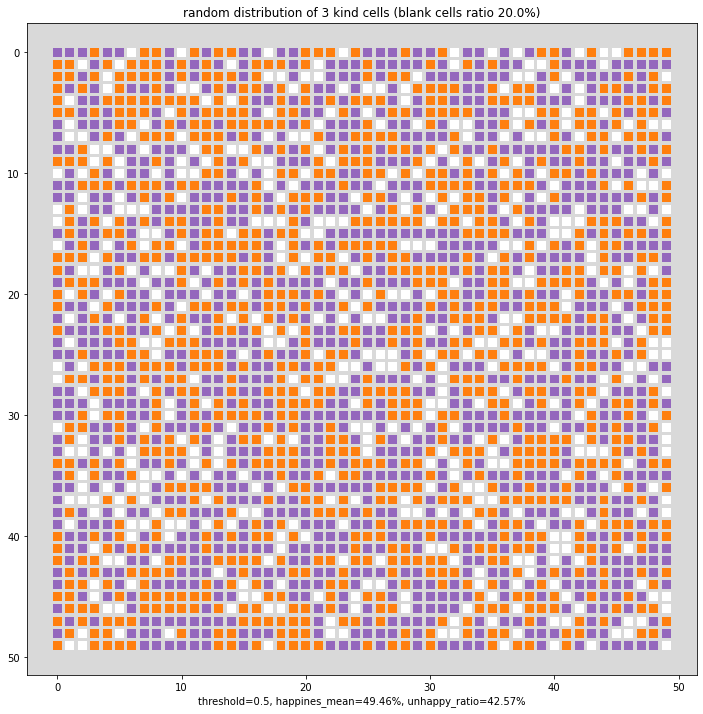

In [5]:
draw_raw(Z)

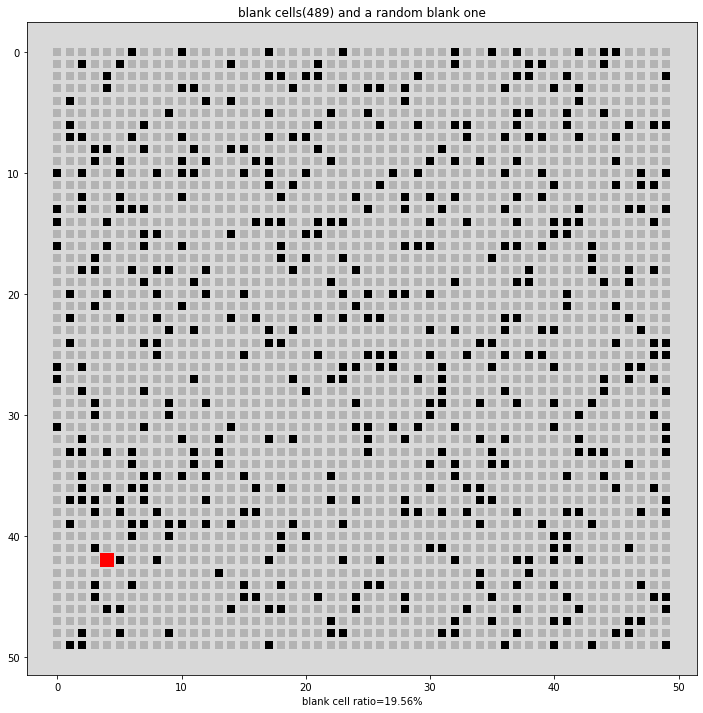

In [6]:
draw_nullcells(Z)

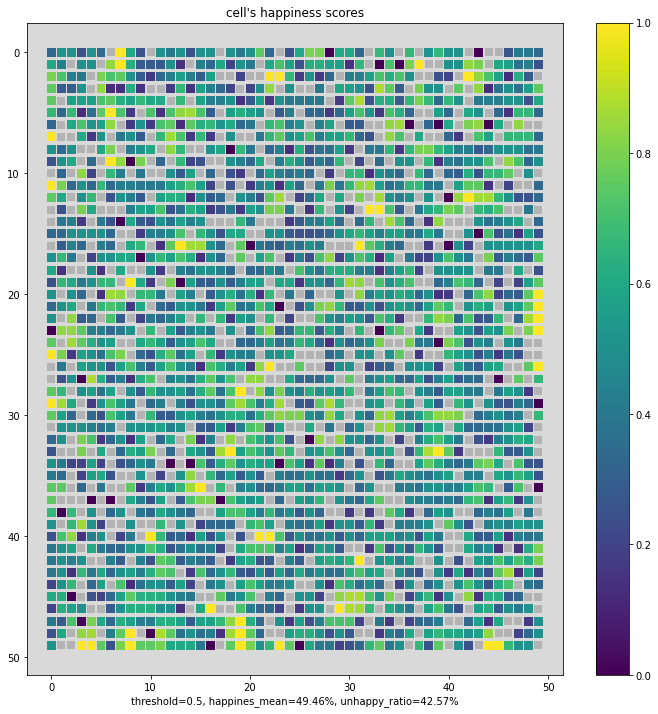

In [7]:
draw_happiness(Z)

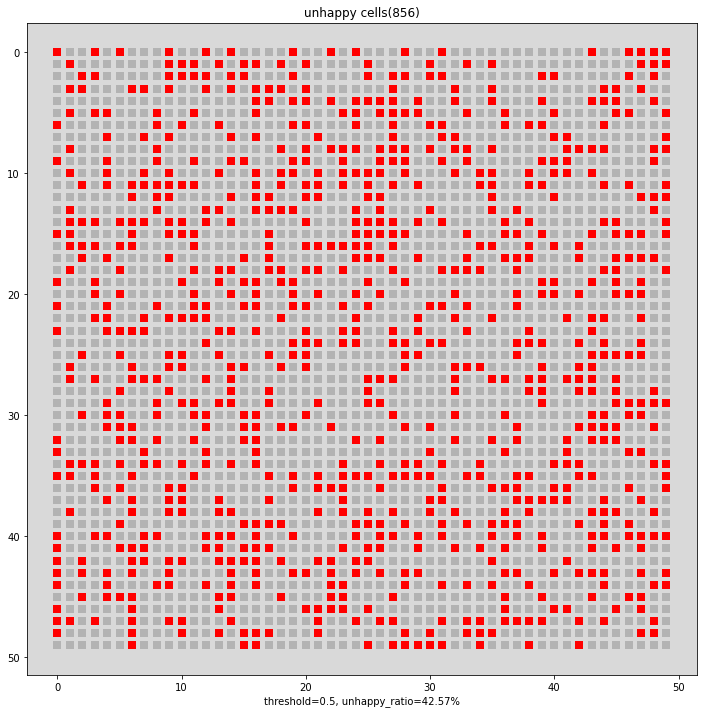

In [8]:
draw_unhapcells(Z)

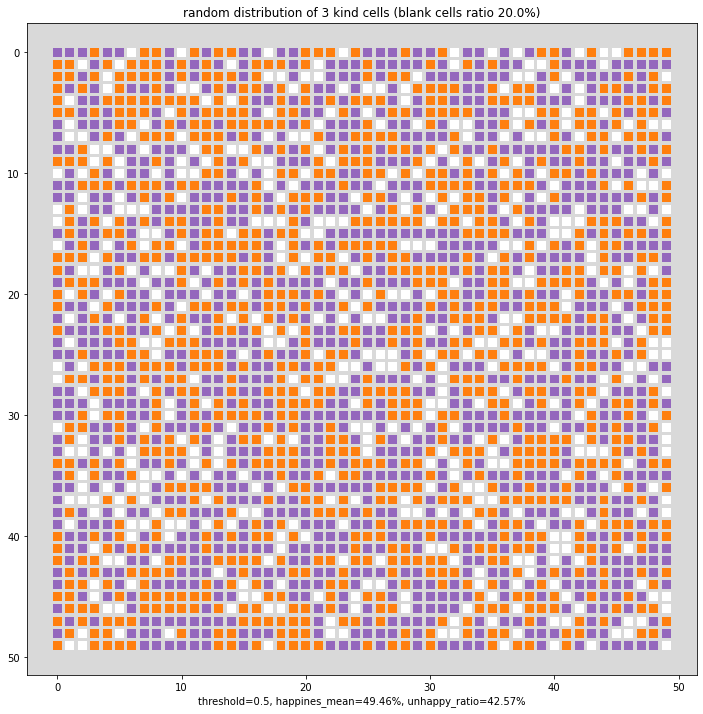

17

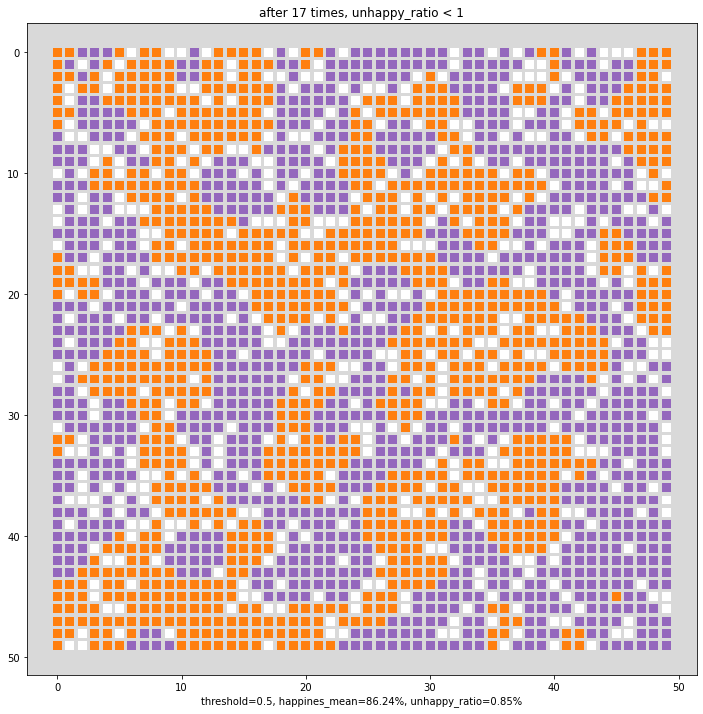

17

In [9]:
find_times_equal(Z,1)